In [1]:
from ColorExtractor import post
from ColorExtractor import tools
import re
import typer
res = [int(s) for s in re.findall(
    r'\d+', "8756_8768_12124_12137_z15_t110400")]
# print(res)
zoom = res[4]
# print(res[0], res[2])
# print(res[1], res[3])
NW_lat, NW_lng = post.num2deg(res[0], res[2], zoom)
SE_lat, SE_lng = post.num2deg(res[1], res[3], zoom)
print(NW_lat, NW_lng)
print(SE_lat, SE_lng)

# Estabilish the size of the image, Northwest as zero point
X = SE_lat - NW_lat
Y = SE_lng - NW_lng

print(X)
print(Y)

42.32606244456203 -83.8037109375
42.22038178372061 -83.671875
-0.10568066084141492
0.1318359375


In [2]:
import pandas as pd
filename = 'VED_171101_week'
_input = pd.read_csv('./ved_data_enrichment/data/ved-final/'+filename+'.csv',
                             dtype={"Matchted Latitude[deg]": float, 'Matched Longitude[deg]': float,
                                    'Vehicle Speed[km/h]': float, 'Speed Limit[km/h]': 'string'},
                             nrows=1000)

Length of rest_point_delta:  3
[(41, -10), (19, -7), (0, 0)]
Max delta:  41
cropped shape:  (120, 120, 3)
rest_point_delta
[(51, 0), (29, 3), (10, 10)]
(40, 40)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


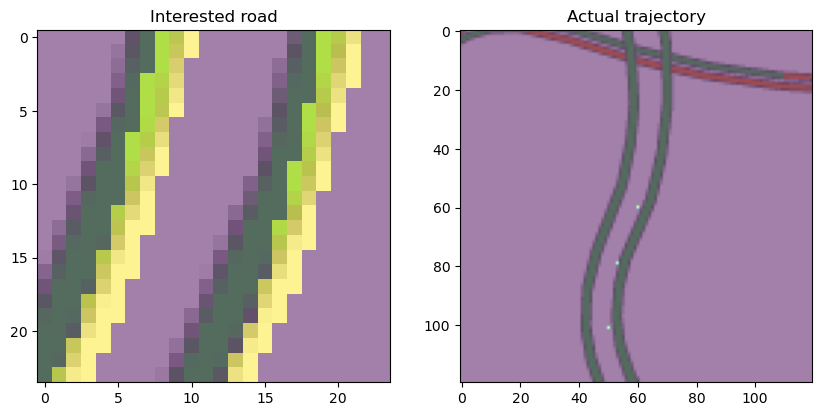

Match type:  [1, 1, 0, 1, 1, 1, 0, 1]


In [3]:
_input = _input[['VehId', 'DayNum', 'Matched Longitude[deg]', 'Matchted Latitude[deg]', 'Vehicle Speed[km/h]', 'Speed Limit[km/h]', 'Match Type', 'Longitude[deg]', 'Latitude[deg]']]
_input['Speed Limit[km/h]'] = pd.to_numeric(_input['Speed Limit[km/h]'], errors='coerce')
_input = _input.assign(Color_code='-1')
_input['Index'] = _input['DayNum'].apply(post.timeCalc)
grouped = _input.groupby(['VehId'])


for name, group in grouped:
    cnt = 0
    for index, row in _input.iterrows():
    # if(chunk['Vehicle Speed[km/h]'].at[index] / chunk['Speed Limit[km/h]'].at[index] >= 0.9):
    #     continue  
        index = 400
        up_limit = 30
        if cnt > up_limit:
            longitude_seq = []
            latitude_seq = []
            for i in range(up_limit):
                # Change every 6 items
                new_index = index
                lng_val = (_input['Matched Longitude[deg]'].at[index - i] - NW_lng)/Y
                lat_val = (_input['Matchted Latitude[deg]'].at[index - i] - NW_lat)/X
                # adptiv track length by delta
                longitude_seq.append(lng_val)
                latitude_seq.append(lat_val)
                idx = _input['Index'].at[index]
                rest_point_delta, max_delta = tools.point_delta(longitude_seq, latitude_seq, idx)
                if max_delta > 20:
                    break
            _input['Color_code'].at[index] = tools.image_process_position_seq(longitude_seq, latitude_seq, idx, rest_point_delta, max_delta)
            break
        else:
            _input['Color_code'].at[index] = tools.image_process(
                (_input['Matched Longitude[deg]'].at[index] - NW_lng)/Y,
                (_input['Matchted Latitude[deg]'].at[index] -NW_lat)/X,
                _input['Index'].at[index])
            break
        cnt += 1

3328 3072
Length of rest_point_delta:  46
[(-302, 21), (-123, 17), (-221, 19), (-546, 432), (-181, 18), (-325, 22), (-529, 433), (-482, 38), (-18, 5), (-86, 17), (-493, 78), (-51, 14), (-161, 17), (-502, 203), (-282, 20), (-517, 428), (-68, 16), (-501, 183), (-422, 31), (-262, 19), (-104, 17), (-496, 121), (-517, 391), (-492, 57), (-446, 33), (-354, 24), (-377, 26), (-466, 36), (-512, 347), (-517, 418), (-35, 9), (-499, 161), (-505, 249), (-511, 324), (-509, 300), (-514, 368), (-142, 17), (-399, 28), (-491, 43), (0, 0), (-200, 18), (-498, 141), (-495, 100), (-504, 225), (-241, 19), (-507, 275)]
Max delta:  546


/var/folders/49/bqdshwxd7cn1kn88j3cflpv00000gn/T/ipykernel_91517/1760926086.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


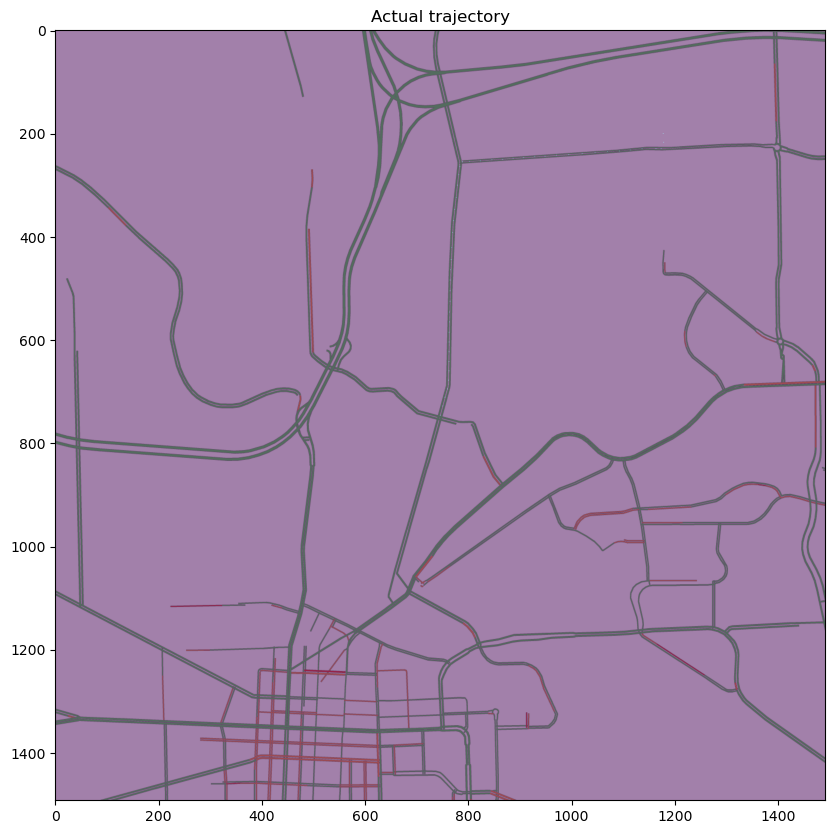

In [4]:
# Show trajectory
long_seq = []
lat_seq = []

matched = True

print(grouped)
target_group = 2
groupID = 0
for name, group in grouped:
    if groupID == target_group:
        for index, row in group.iterrows():
            # print(index)
            if matched:
                lng_val = (_input['Matched Longitude[deg]'].at[index] - NW_lng)/Y
                lat_val = (_input['Matchted Latitude[deg]'].at[index] - NW_lat)/X
            else:
                lng_val = (_input['Longitude[deg]'].at[index] - NW_lng)/Y
                lat_val = (_input['Latitude[deg]'].at[index] - NW_lat)/X
            long_seq.append(lng_val)
            lat_seq.append(lat_val)
    groupID += 1
        

tools.show_trajectory(long_seq, lat_seq, index)